### Data extraction and reformat

In [209]:
import pandas as pd
import numpy as np

Successful (i.e., finished) Wikispeedia paths.
Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
Articles in a path are separated by ";".
Back clicks are represented as "<".
Ratings are optionally given by the user after finishing the game and range from 1 ("easy") to 5 ("brutal").
Missing ratings are represented as "NULL".
FORMAT:   hashedIpAddress   timestamp   durationInSec   path   rating

In [210]:
file_path = './data/paths_finished.tsv'
df_finished = pd.read_csv(file_path, sep='\t', header=None)
cols = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating']
df_finished.columns = cols
df_finished['target'] = df_finished['path'].apply(lambda x: x.split(';')[-1])
df_finished['type'] = 'finished'
df_finished.head()

,hashedIpAddress,timestamp,durationInSec,path,rating,target,type
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN,African_slave_trade,finished
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,African_slave_trade,finished
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,African_slave_trade,finished
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,Greece,finished
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,John_F._Kennedy,finished


Unsuccessful (i.e., unfinished) Wikispeedia paths.
Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
Articles in a path are separated by ";".
Back clicks are represented as "<".
There are two types of quitting:
(1) "timeout" means that no click was made for 30 minutes;
(2) "restart" means that the user started a new game without finishing the current one.
FORMAT:   hashedIpAddress   timestamp   durationInSec   path   target   type

In [211]:
file_path = './data/paths_unfinished.tsv'
df_unfinished = pd.read_csv(file_path, sep='\t', header=None)
cols = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type']
df_unfinished.columns = cols
df_unfinished

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout


In [212]:
## merge finished and unfinished
df = pd.concat([df_finished, df_unfinished], axis=0)
df['start'] = df['path'].apply(lambda x: x.split(';')[0])
df.head()

,hashedIpAddress,timestamp,durationInSec,path,rating,target,type,start
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN,African_slave_trade,finished,14th_century
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,African_slave_trade,finished,14th_century
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,African_slave_trade,finished,14th_century
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,Greece,finished,14th_century
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,John_F._Kennedy,finished,14th_century


In [213]:
# dump to tsv
df.to_csv('./data/paths_all.tsv', sep='\t', index=False)

The list of all links between articles.
Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
FORMAT:   linkSource   linkTarget

In [214]:
# load the links
file_path = './data/links.tsv'
df_links = pd.read_csv(file_path, sep='\t', header=None)
df_links

,0,1
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Bede
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Columba
2,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,D%C3%A1l_Riata
3,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Great_Britain
4,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Ireland
...,...,...
119877,Zulu,South_Africa
119878,Zulu,Swaziland
119879,Zulu,United_Kingdom
119880,Zulu,Zambia


In [215]:
articles = set(df_links[0].unique()).union(set(df_links[1].unique()))


### Statistics and visualization

- basics

In [216]:
print('Number of games played: {}, with {:.2f}% finished rate'.format(len(df), len(df_finished)/len(df)*100))
print('Number of participated individuals: {}'.format(len(df['hashedIpAddress'].unique())))
used_articles = set([item for sublist in df['path'].apply(lambda x: x.split(';')) for item in sublist])
print('Number of articles: {}, {:.2f}% are covered in the game'.format(len(articles), len(used_articles)/len(articles)*100))
print('Number of edges: {}, with average degree {:.0f}'.format(len(df_links), len(df_links)/len(articles)))

Number of games played: 76193, with 67.35% finished rate
Number of participated individuals: 20868
Number of articles: 4592, 91.09% are covered in the game
Number of edges: 119882, with average degree 26


- degree distribution
Consider that every edge is bidirectional because the user can go back through the back button.

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns


articles = pd.read_csv('./data/articles.tsv', sep='\t', header=None)
articles.columns = ['article']
# left join to get the degree of each article
degree_out = df_links.groupby(0).count().reset_index()
degree_out.columns = ['article', 'degree_out']
degree_in = df_links.groupby(1).count().reset_index()
degree_in.columns = ['article', 'degree_in']
articles = articles.merge(degree_out, on='article', how='left').fillna(0).merge(degree_in, on='article', how='left').fillna(0)
articles['degree'] = articles['degree_out'] + articles['degree_in']
articles.describe()


,degree_out,degree_in,degree
count,4604.000000,4604.000000,4604.000000
mean,26.038662,26.038662,52.077324
std,24.201491,62.746827,78.551771
min,0.000000,0.000000,0.000000
25%,11.000000,2.000000,16.000000
50%,19.000000,8.000000,30.000000
75%,33.000000,25.000000,59.000000
max,294.000000,1551.000000,1845.000000


In [218]:
# print top 5 articles with highest degree
articles.sort_values('degree', ascending=False).head()

,article,degree_out,degree_in,degree
4297,United_States,294.0,1551.0,1845.0
4293,United_Kingdom,168.0,972.0,1140.0
1433,Europe,159.0,933.0,1092.0
1568,France,85.0,959.0,1044.0
1385,England,172.0,751.0,923.0


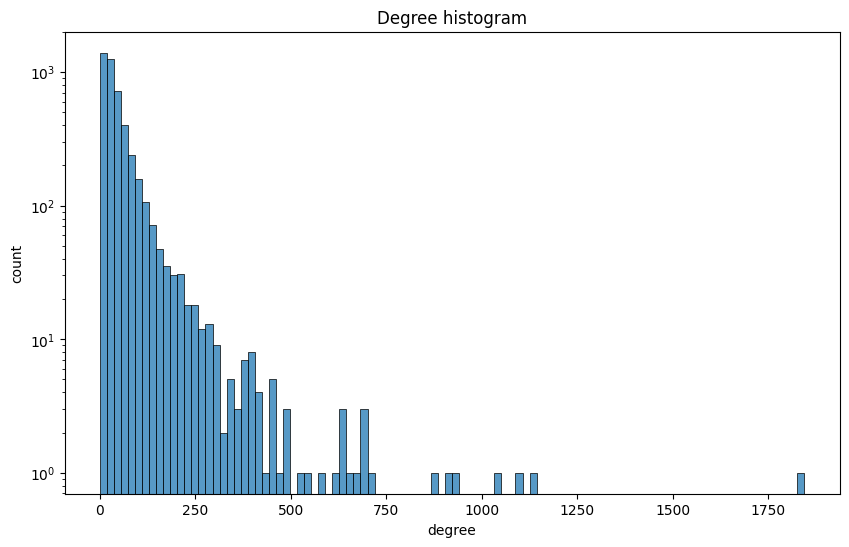

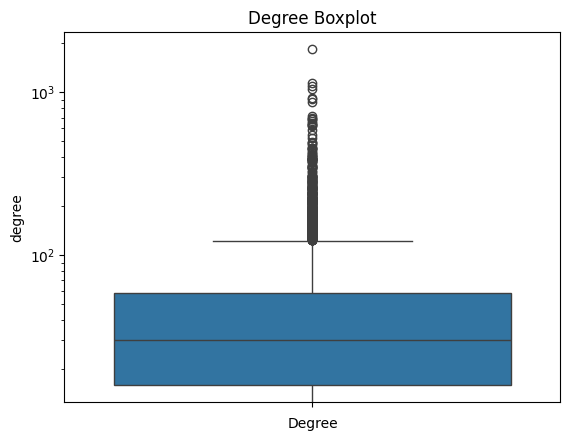

In [219]:
# plot the hist degree distribution with logy scale
plt.figure(figsize=(10, 6))
sns.histplot(articles['degree'], kde=False, bins=100)
plt.yscale('log')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('Degree histogram')
plt.show()

sns.boxplot(articles['degree'])
plt.xlabel('Degree')  
plt.title('Degree Boxplot') 
plt.yscale('log')
plt.show()

- path length distribution

In [220]:
df['path_length'] = df['path'].apply(lambda x: len(x.split(';')))
df['path_length'].describe()

count    76193.000000
mean         6.248251
std          5.115519
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max        435.000000
Name: path_length, dtype: float64

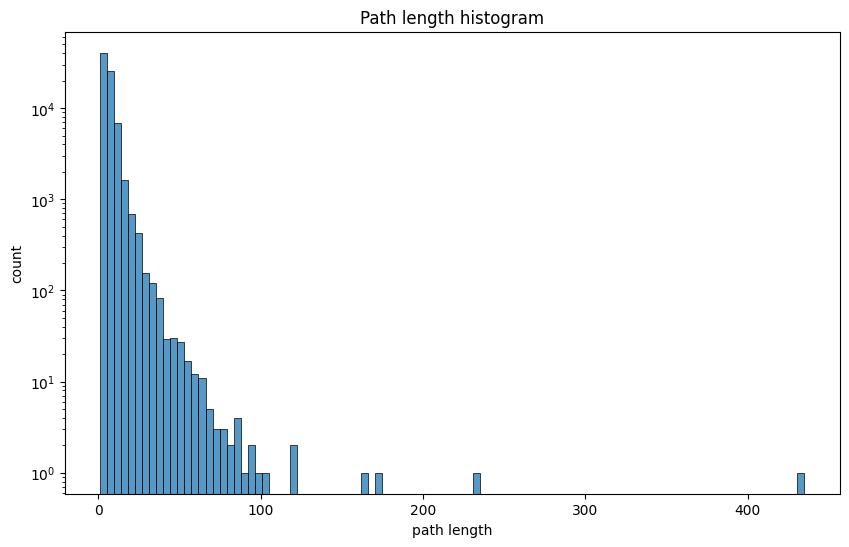

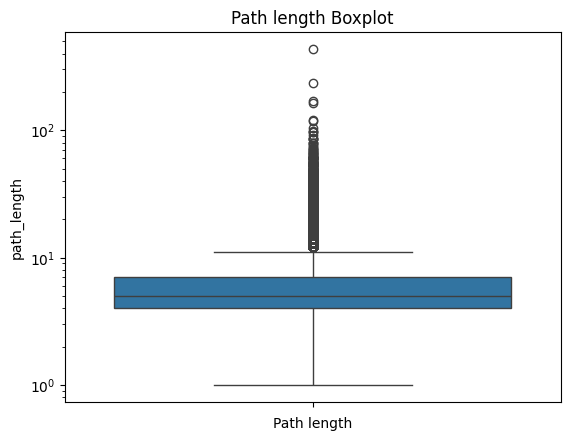

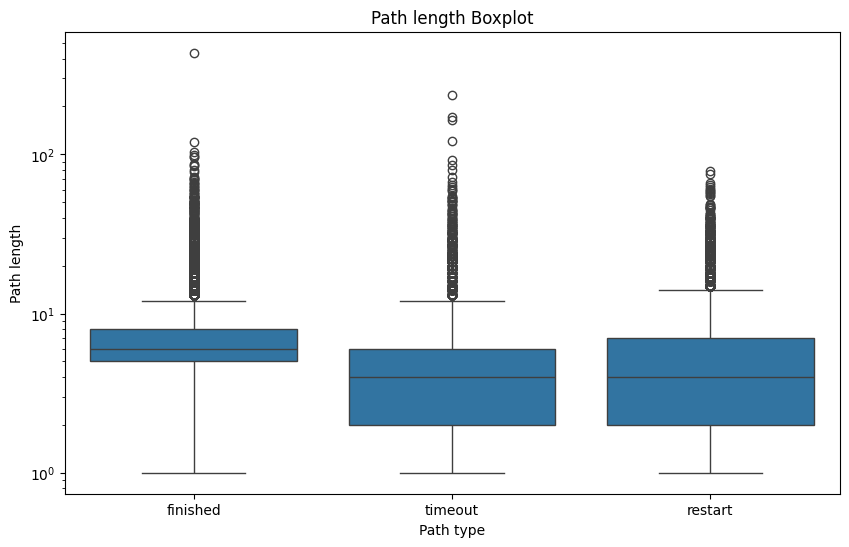

In [221]:
# plot the hist path length distribution and boxplot
plt.figure(figsize=(10, 6))
sns.histplot(df['path_length'], kde=False, bins=100)
plt.yscale('log')
plt.xlabel('path length')
plt.ylabel('count')
plt.title('Path length histogram')
plt.show()

sns.boxplot(df['path_length'])
plt.xlabel('Path length')
plt.title('Path length Boxplot')
plt.yscale('log')
plt.show()

# 2 boxplot with finished and unfinished paths
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='path_length', data=df)
plt.yscale('log')
plt.xlabel('Path type')
plt.ylabel('Path length')
plt.title('Path length Boxplot')
plt.show()


- relation between a frequently visited article it's degree

In [222]:
# substitue the < sign in each path with the previous article
import re

def replace_lt_with_previous(article_path):
    path_elements = article_path.split(';')
    for i, element in enumerate(path_elements):
        if element == '<' and i > 1:
            path_elements[i] = path_elements[i-2]
    return ';'.join(path_elements)

df['path'] = df['path'].apply(replace_lt_with_previous)

# count the frequency of each article
article_freq = pd.DataFrame(df['path'].apply(lambda x: x.split(';')).explode().value_counts()).reset_index()
articles_cnt = pd.merge( articles, article_freq, left_on='article', right_on='path', how='left').fillna(0)
# drop path column
articles_cnt.drop('path', axis=1, inplace=True)
articles_cnt['count'].describe()

count     4604.000000
mean       103.404214
std        339.894277
min          0.000000
25%         15.000000
50%         34.000000
75%         81.000000
max      13617.000000
Name: count, dtype: float64

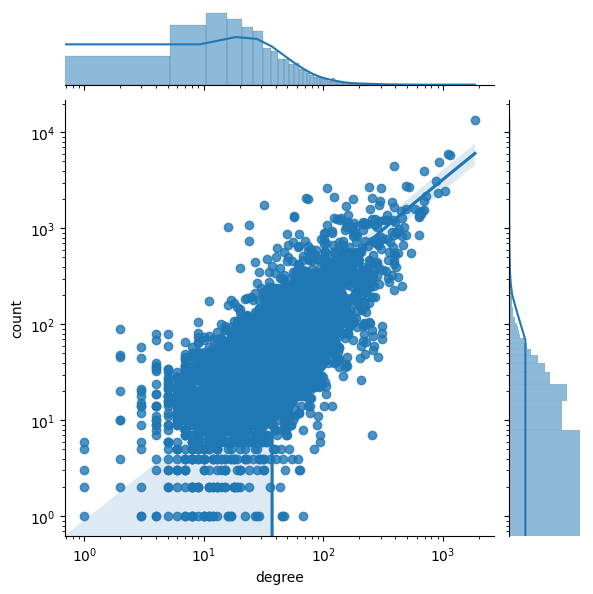

In [223]:
sns.jointplot(x='degree', y='count', data=articles_cnt, kind='reg')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [224]:
# test if the degree and count are correlated
from scipy.stats import pearsonr
pearsonr(articles_cnt['degree'], articles_cnt['count'])



PearsonRResult(statistic=0.765211321722257, pvalue=0.0)

In [225]:
# load the shortest path
file_path = './data/shortest-path-distance-matrix.txt'
df_shortest_path = pd.read_csv(file_path, sep='\t', header=None)


def find_p(row):
    start_idx = articles[articles['article'] == row['start']].index
    target_idx = articles[articles['article'] == row['target']].index
    if(row['type'] != 'finished'):
        return -1
    if not start_idx.empty and not target_idx.empty:

        start_idx = start_idx[0]
        target_idx = target_idx[0]

        s = df_shortest_path.iloc[start_idx][0]

        return 0 if s[target_idx] == '_' else int(s[target_idx])
    else:
        print(row['start'], row['target'],row['type'],row['path'])
        return 0

df['shortest_path'] = df.apply(find_p, axis=1)


PearsonRResult(statistic=0.20097957001845854, pvalue=0.0)

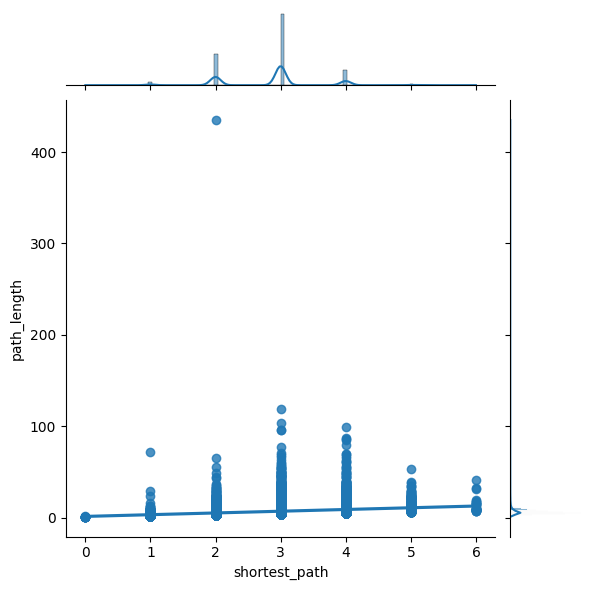

In [226]:
sns.jointplot(x='shortest_path', y='path_length', data=df[df['type'] == 'finished'], kind='reg')

pearsonr(df['shortest_path'], df['path_length'])